### Intrusion Detection System Model Development


Goal: Build a reusable machine learning pipeline for network intrusion detection.

Objective: Classify network traffic as normal or malicious using RandomForestClassifier. 

Justification: RandomForest is chosen for its robustness in handling various data types and its effectiveness in classification tasks.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import seaborn as sns
import joblib


In [2]:
# Define the column names for the dataset
columns = [
    "duration", "protocol_type", "service", "flag", "src_bytes",
    "dst_bytes", "land", "wrong_fragment", "urgent", "hot", "num_failed_logins",
    "logged_in", "num_compromised", "root_shell", "su_attempted", "num_root",
    "num_file_creations", "num_shells", "num_access_files", "num_outbound_cmds",
    "is_host_login", "is_guest_login", "count", "srv_count", "serror_rate",
    "srv_serror_rate", "rerror_rate", "srv_rerror_rate", "same_srv_rate",
    "diff_srv_rate", "srv_diff_host_rate", "dst_host_count", "dst_host_srv_count",
    "dst_host_same_srv_rate", "dst_host_diff_srv_rate", "dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate", "dst_host_serror_rate", "dst_host_srv_serror_rate",
    "dst_host_rerror_rate", "dst_host_srv_rerror_rate", "label", "difficulty_level"
]



In [3]:
# Load the dataset
file_path = '/Users/maryam/ML-IDS/archive/KDDTrain+.txt'  # Replace with your dataset path
data = pd.read_csv(file_path, header=None, names=columns)

data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,difficulty_level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [4]:
# Encoding categorical features and selecting numeric features
categorical_features = ['protocol_type', 'service', 'flag']
numeric_features = data.columns.drop(categorical_features + ['label', 'difficulty_level'])

In [5]:
# Preprocessing pipeline
# StandardScaler normalizes numerical features, and OneHotEncoder encodes categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

In [6]:
# Split data into features (X) and labels (y)
X = data.drop(['label', 'difficulty_level'], axis=1)
y = data['label']

In [7]:
# Split data into training and testing sets
# test_size determines the proportion of data used for testing (20% in this case)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
# Initialize the RandomForestClassifier
# random_state ensures reproducibility
clf = RandomForestClassifier()


In [9]:
# Creating a pipeline that first preprocesses the data and then applies the classifier
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', clf)
])


In [10]:

# Training the model on the training data
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
       'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
       'root_shell', 'su_attempted', 'num_root', 'num_file_creations',
       'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is...
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate'],
      dtype='object')),
                                                 ('cat', OneHotEncoder(),
                                                  ['protocol_type', 'service',
                                                   'flag'])])),
             

In [11]:
# Predicting on the test data
predictions = pipeline.predict(X_test)

In [12]:
# Evaluating the model performance
report = classification_report(y_test, predictions)
print(report)

/Users/maryam/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                 precision    recall  f1-score   support

           back       1.00      1.00      1.00       185
buffer_overflow       1.00      0.33      0.50         9
   guess_passwd       1.00      0.91      0.95        11
           imap       1.00      1.00      1.00         1
        ipsweep       0.99      0.99      0.99       733
           land       0.00      0.00      0.00         3
        neptune       1.00      1.00      1.00      8228
           nmap       0.98      0.99      0.99       313
         normal       1.00      1.00      1.00     13422
           perl       0.00      0.00      0.00         1
            phf       1.00      1.00      1.00         1
            pod       1.00      0.93      0.96        43
      portsweep       1.00      1.00      1.00       573
        rootkit       0.00      0.00      0.00         1
          satan       1.00      0.99      0.99       738
          smurf       1.00      1.00      1.00       534
            spy       0.00    

/Users/maryam/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/maryam/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


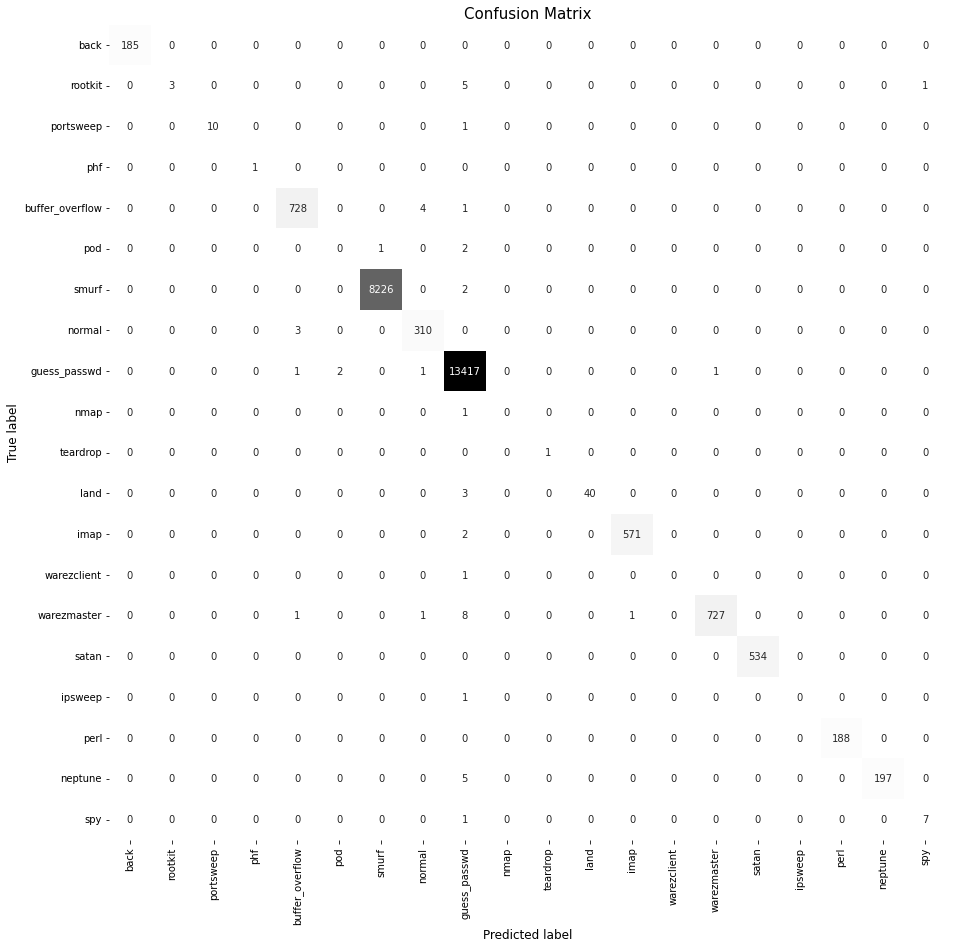

In [13]:

# Generate confusion matrix
cm = confusion_matrix(y_test, predictions)

# Make the figure larger to ensure labels are legible
plt.figure(figsize=(15, 15))

# Use binary color scheme with annotations
sns.heatmap(cm, annot=True, fmt='d', cmap='binary', cbar=False, xticklabels=set(y_test), yticklabels=set(y_test))

# Improve the aesthetics of the plot
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.xlabel('Predicted label', fontsize=12)
plt.ylabel('True label', fontsize=12)
plt.title('Confusion Matrix', fontsize=15)

# Display the plot
plt.show()


The diagonal line going from the top left corner to the bottom right corner shows where the model has correctly identified the activity. For instance, it accurately identified 'imap' activity 13,417 times. The big numbers on this line are good; they mean the model is doing its job well.


However, there are also some smaller numbers not on the diagonal line. These represent mistakes—where the model thought the activity was one thing, but it was actually something else. For instance, it confused 'neptune' with 'back' 6 times.

In [14]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate metrics for training set
training_accuracy = accuracy_score(y_train, pipeline.predict(X_train))
training_precision = precision_score(y_train, pipeline.predict(X_train), average='weighted')
training_recall = recall_score(y_train, pipeline.predict(X_train), average='weighted')
training_f1 = f1_score(y_train, pipeline.predict(X_train), average='weighted')

# Calculate metrics for testing set
testing_accuracy = accuracy_score(y_test, predictions)
testing_precision = precision_score(y_test, predictions, average='weighted')
testing_recall = recall_score(y_test, predictions, average='weighted')
testing_f1 = f1_score(y_test, predictions, average='weighted')

# Create a DataFrame with the metrics
metrics_df = pd.DataFrame(
    {
        'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
        'Training Set': [training_accuracy, training_precision, training_recall, training_f1],
        'Testing Set': [testing_accuracy, testing_precision, testing_recall, testing_f1]
    }
)

# Set the metric names as the index
metrics_df.set_index('Metric', inplace=True)

# Display the DataFrame
print(metrics_df)


/Users/maryam/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


           Training Set  Testing Set
Metric                              
Accuracy       0.999940     0.998015
Precision      0.999941     0.997861
Recall         0.999940     0.998015
F1 Score       0.999941     0.997872


##### Save the trained model to a file


In [15]:
joblib.dump(pipeline, 'random_forest_model.joblib')


['random_forest_model.joblib']

##### Load the Model for Future Use

In [16]:
loaded_model = joblib.load('random_forest_model.joblib')


In [17]:
import pandas as pd
from sklearn.metrics import accuracy_score
import joblib

# Load the saved model
model = joblib.load('/Users/maryam/ML-IDS/random_forest_model.joblib')  # Update the path

# Load the new dataset
file_path_new_data = '/Users/maryam/ML-IDS/archive/KDDTest+.txt'  # Update with the path to your new dataset
new_data_columns = [
    "duration", "protocol_type", "service", "flag", "src_bytes",
    "dst_bytes", "land", "wrong_fragment", "urgent", "hot", "num_failed_logins",
    "logged_in", "num_compromised", "root_shell", "su_attempted", "num_root",
    "num_file_creations", "num_shells", "num_access_files", "num_outbound_cmds",
    "is_host_login", "is_guest_login", "count", "srv_count", "serror_rate",
    "srv_serror_rate", "rerror_rate", "srv_rerror_rate", "same_srv_rate",
    "diff_srv_rate", "srv_diff_host_rate", "dst_host_count", "dst_host_srv_count",
    "dst_host_same_srv_rate", "dst_host_diff_srv_rate", "dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate", "dst_host_serror_rate", "dst_host_srv_serror_rate",
    "dst_host_rerror_rate", "dst_host_srv_rerror_rate", "label", "difficulty_level"
]

df_new = pd.read_csv(file_path_new_data, header=None, names=new_data_columns)

# Preprocess the new data (assuming the same preprocessing steps as the training data)
X_new = df_new.drop(['label', 'difficulty_level'], axis=1)
y_new = df_new['label']

# Apply the preprocessing from the saved pipeline (assuming the pipeline includes preprocessing)
X_new_processed = model.named_steps['preprocessor'].transform(X_new)




0,tcp,http,SF,316,354,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,25,25,0.00,0.00,0.00,0.00,1.00,0.00,0.00,255,255,1.00,0.00,0.00,
0.00,0.00,0.00,0.00,0.00,normal,21 

 0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,188,1,1.00,1.00,0.00,0.00,0.01,0.06,0.00,255,20,0.08,
 0.07,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19



0,tcp,http,SF,54540,8314,0,0,0,2,0,1,1,0,0,0,0,0,0,0,0,0,2,9,0.00,0.00,0.50,0.11,1.00,0.00,0.22,255,229,0.90,0.01,
0.00,0.00,0.00,0.00,0.01,0.00,back,10

In [18]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import joblib
import numpy as np

# Example for prediction
# example = ['0', 'tcp', 'http', 'SF', '316', '354', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '25', '25', '0.00', '0.00', '0.00', '0.00', '1.00', '0.00', '0.00', '255', '255', '1.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00']
"""example= [
    "0", "tcp", "private", "S0", "0", "0", "0", "0", "0", "0", 
    "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", 
    "188", "1", "1.00", "1.00", "0.00", "0.00", "0.01", "0.06", 
    "0.00", "255", "20", "0.08", "0.07", "0.00", "0.00", "1.00", 
    "1.00", "0.00", "0.00"

]"""



example = [
    "0", "tcp", "http", "SF", "54540", "8314", "0", "0", "0", "2", 
    "0", "1", "1", "0", "0", "0", "0", "0", "0", "0", "0", "0", 
    "2", "9", "0.00", "0.00", "0.50", "0.11", "1.00", "0.00", 
    "0.22", "255", "229", "0.90", "0.01", "0.00", "0.00", "0.00", 
    "0.00", "0.01", "0.00"
]
# print attack types and their corresponding labels
attack_types = {
    'normal': 'normal',
    'back': 'DoS',
    'buffer_overflow': 'U2R',
    'ftp_write': 'R2L',
    'guess_passwd': 'R2L',
    'imap': 'R2L',
    'ipsweep': 'Probe',
    'land': 'DoS',
    'loadmodule': 'U2R',
    'multihop': 'R2L',
    'neptune': 'DoS',
    'nmap': 'Probe',
    'perl': 'U2R',
    'phf': 'R2L',
    'pod': 'DoS',
    'portsweep': 'Probe',
    'rootkit': 'U2R',
    'satan': 'Probe',
    'smurf': 'DoS',
    'spy': 'R2L',
    'teardrop': 'DoS',
    'warezclient': 'R2L',
    'warezmaster': 'R2L',
    'ipsweep': 'Probe',
    'satan': 'Probe',
    'portsweep': 'Probe',
    'teardrop': 'DoS',
    'nmap': 'Probe',
    'saint': 'Probe'
}
# Convert the example to a DataFrame
example_df = pd.DataFrame([example], columns=columns[:-2])  # excluding 'label' and 'difficulty_level'

# Preprocess the example (using the same preprocessing as the training data)
X_example_processed = model.named_steps['preprocessor'].transform(example_df)

# Make the prediction
specific_prediction_array = model.named_steps['classifier'].predict(X_example_processed)


# Extract the first element from the prediction array
specific_prediction = specific_prediction_array[0] if len(specific_prediction_array) > 0 else 'Unknown'

# Translate the specific prediction to its broader category
broader_category = attack_types.get(specific_prediction, 'Unknown')

# Output both the specific prediction and the broader category prediction
print(f"Specific Prediction: {specific_prediction}")
print(f"Broader Category: {broader_category}")

Specific Prediction: back
Broader Category: DoS


In [19]:
%pip install spacy

Note: you may need to restart the kernel to use updated packages.
